# Soustava prutů

Vypracoval: Filip Horák, 2017/2018

U soustavy prutů dle obrázku nalezněte prut s největším zatížením a určete jeho bezpečnost k meznímu stavu pružnosti.

## Řešení

Ze začátku je nutné naimportovat potřebné knihovny.

In [1]:
import numpy as np
import sympy as sp
from IPython.core.display import Image
sp.init_printing()

Vyvoláme obrázek úlohy.

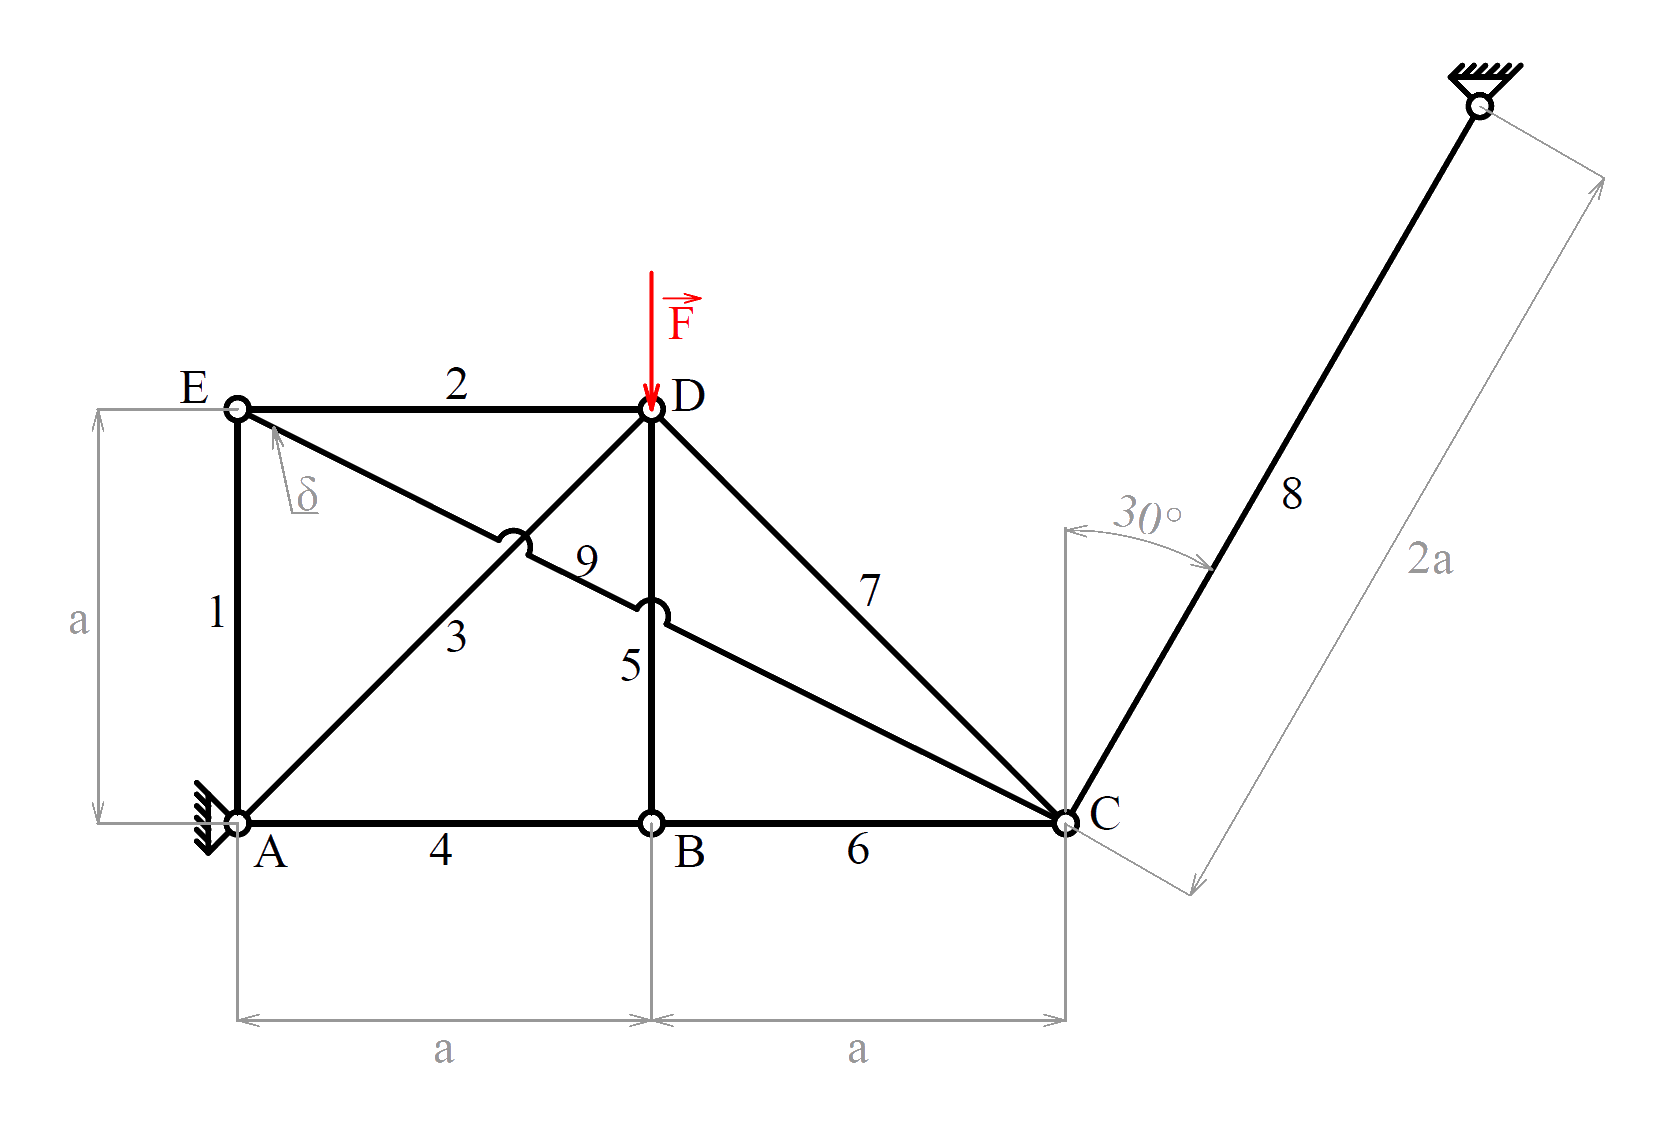

In [2]:
Image(filename='03-tt-soustava-1.png', width=600)

Provedeme částečné uvolnění prutu 9 s přesahem $\delta$ a následně uvolníme jednotlivé styčníky.

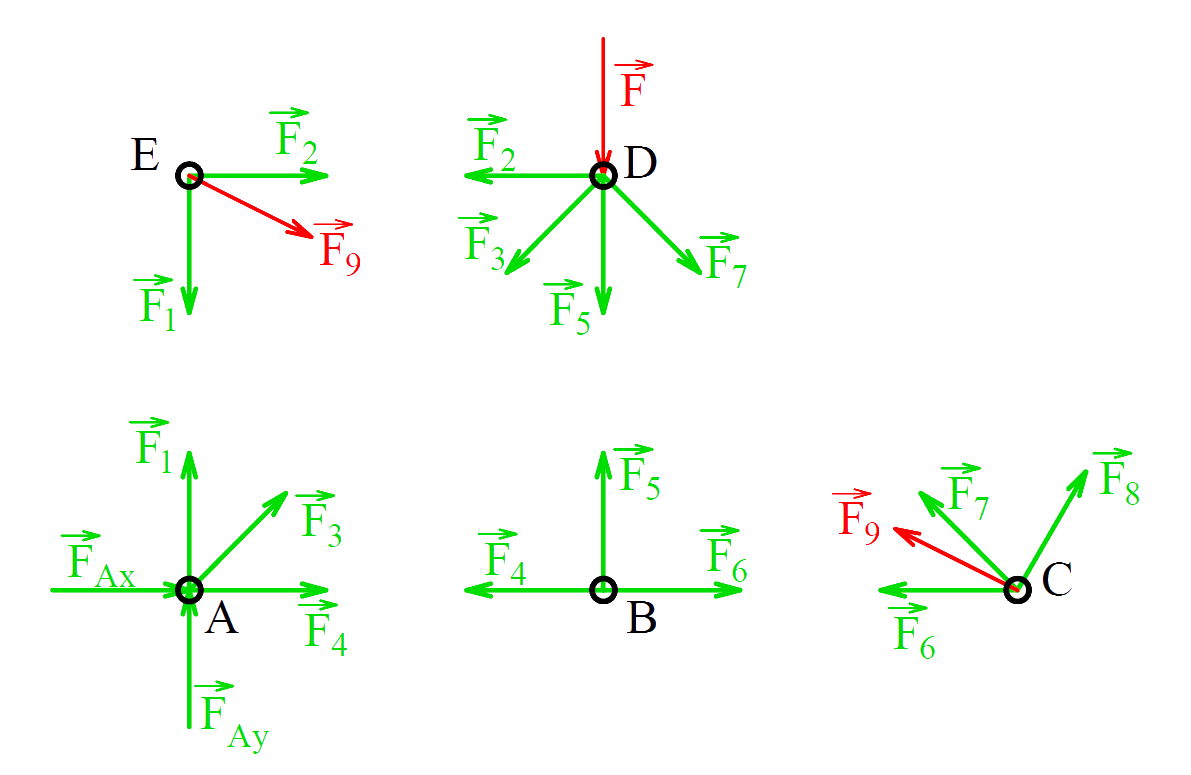

In [3]:
Image(filename='03-tt-soustava-2.png', width=500)

Deformační podmínky budou vypadat následovně: 
$$u_E = -\delta$$

Zavedeme potřebné proměnné jako symboly.

In [4]:
FAx,FAy,F=sp.symbols('F_Ax F_Ay F')
F1,F2,F3,F4,F5,F6,F7,F8,F9=sp.symbols('F1 F2 F3 F4 F5 F6 F7 F8 F9')
E=sp.symbols('E')
S=sp.symbols('S')
a=sp.symbols('a')
delta,sk=sp.symbols('delta sigma_k')

Sestavíme rovnice rovnováhy styčníků.

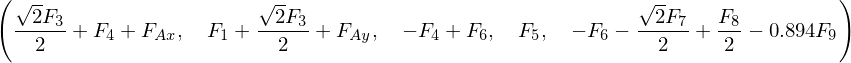

In [5]:
eqn1=FAx+F3*sp.cos(sp.pi/4)+F4
eqn2=FAy+F1+F3*sp.sin(sp.pi/4)
eqn3=-F4+F6
eqn4=F5
eqn5=-F6-F7*sp.cos(sp.pi/4)+F8*sp.cos(sp.pi/3)-F9*sp.N(sp.cos(sp.atan(1/2)),3)
eqn6=F7*sp.sin(sp.pi/4)+F8*sp.sin(sp.pi/3)+F9*sp.N(sp.sin(sp.atan(1/2)),3)
eqn7=-F2-F3*sp.cos(sp.pi/4)+F7*sp.cos(sp.pi/4)
eqn8=-F-F5-F3*sp.sin(sp.pi/4)-F7*sp.sin(sp.pi/4)
eqn9=F2+F9*sp.N(sp.cos(sp.atan(1/2)),3)
eqn10=-F1-F9*sp.N(sp.sin(sp.atan(1/2)),3)
eqn1,eqn2,eqn3,eqn4,eqn5

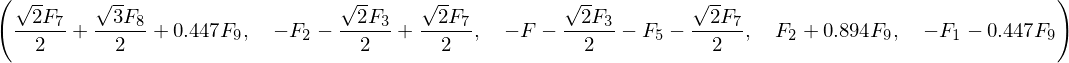

In [6]:
eqn6,eqn7,eqn8,eqn9,eqn10

Vyjádříme jednotlivé síly pomocí vyšetřované síly $F_{9}$.

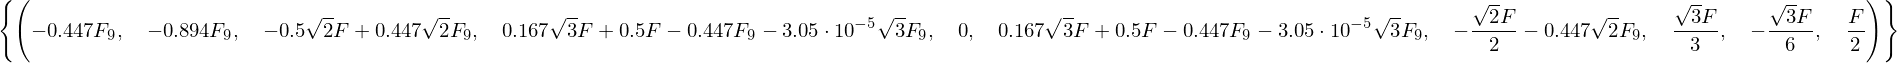

In [7]:
sol=sp.linsolve([eqn1,eqn2,eqn3,eqn4,eqn5,eqn6,eqn7,eqn8,eqn9,eqn10], \
             [F1,F2,F3,F4,F5,F6,F7,F8,FAx,FAy],)
sol

Spočtené síly přiřadíme příslušným vnitřním účinkům.

In [8]:
N1,N2,N3,N4,N5,N6,N7,N8,FAx_,FAy_=next(iter(sol))
N9=F9

Vytvoříme vektor výsledných účinků.

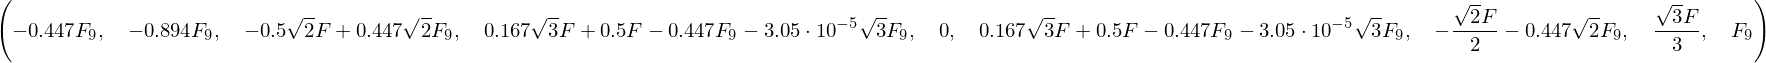

In [9]:
N=N1,N2,N3,N4,N5,N6,N7,N8,N9
N

Sestavíme vektor délek jednotlivých prutů.

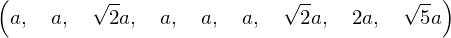

In [10]:
l=a,a,sp.sqrt(2)*a,a,a,a,sp.sqrt(2)*a,2*a,sp.sqrt(5)*a
l

Vyjádříme potenciální energii soustavy prutů.

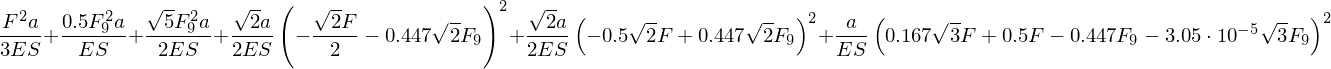

In [11]:
w=[]
for ii in enumerate(N):
  w.append(ii[1]**2*l[ii[0]]/2/E/S)
W=sum(w)
W

Sestavíme parciální derivaci a deformační podmínku.
$$u_E =\frac{\partial W}{\partial F_9} = -\delta$$

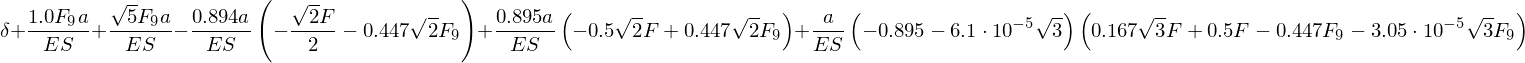

In [12]:
eqn1=W.diff(F9)+delta
eqn1

Výpočet neznámé síly $F_{9}$.

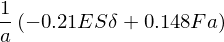

In [13]:
sol1=sp.solve(eqn1,F9)
sp.N(sol1[0],3)

Dosazení $F_{9}$ do vnitřních účinků.

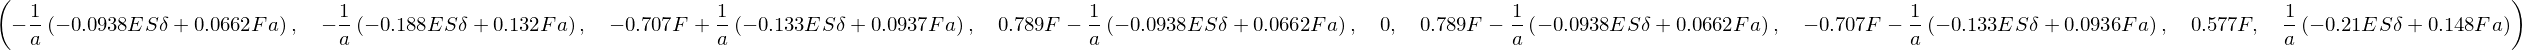

In [14]:
F9_=sol1[0]
N1_=N1.subs(F9,F9_)
N2_=N2.subs(F9,F9_)
N3_=N3.subs(F9,F9_)
N4_=N4.subs(F9,F9_)
N5_=N5.subs(F9,F9_)
N6_=N6.subs(F9,F9_)
N7_=N7.subs(F9,F9_)
N8_=N8.subs(F9,F9_)
N9_=N9.subs(F9,F9_)
sp.N(N1_,3),sp.N(N2_,3),sp.N(N3_,3),sp.N(N4_,3),sp.N(N5_,3),sp.N(N6_,3),sp.N(N7_,3),sp.N(N8_,3),sp.N(N9_,3)

Zavedeme číselné hodnoty veličin.
$$\begin{align}
a & = 500\, \mathrm{mm} \\
d & = 20\, \mathrm{mm} \\
\delta & = 2\, \mathrm{mm} \\
F & = 1000\, \mathrm{N} \\
E & = 2.1\cdot 10^5\, \mathrm{MPa} \\
S & = \frac{\pi d^2}{4} \approx 314\, \mathrm{mm^2}\\
\sigma_K & = 360\, \mathrm{MPa}
\end{align}$$

In [15]:
d_=20.
S_=sp.pi*d_**2/4
E_=2.1e5
F_=1000.
a_=500.
delta_=2.
sigma_k=360.

Dosazení číselných hodnot do vnitřních účinků.

In [16]:
N1_1=float(N1_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N2_1=float(N2_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N3_1=float(N3_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N4_1=float(N4_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N5_1=float(N5_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N6_1=float(N6_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N7_1=float(N7_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N8_1=float(N8_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
N9_1=float(N9_.subs({F:F_,a:a_,E:E_,S:S_,delta:delta_}))
sp.N(N1_1,8),sp.N(N2_1,8),sp.N(N3_1,8),sp.N(N4_1,8),sp.N(N5_1,7),sp.N(N6_1,8),sp.N(N7_1,8),sp.N(N8_1,7),sp.N(N9_1,8)

Vypíšeme číslo prutu s největší normálovou silou a velikost normálové síly v prutu v Newtonech.

In [17]:
N_abs=abs(N1_1),abs(N2_1),abs(N3_1),abs(N4_1),abs(N5_1),abs(N6_1),abs(N7_1),abs(N8_1),abs(N9_1)
n_max=N_abs.index(max(N_abs))
N_max=max(np.absolute(N_abs))
n_max,sp.N(N_max,8)

Spočteme bezpečnost prutu.

In [18]:
sigma_max=float(N_max/S_)
Kk=sigma_k/sigma_max
sp.N(Kk,4)